# 2º Trabalho Ciência de Redes

# Animais: Pinguins de Kioto

https://bitbucket.org/mhfeng/penguins_of_kyoto/src/master/

### Resumo: Uma rede de relações sociais entre pinguins no Zoológico de Kyoto(Kyoto Aquarium). Os nós são pinguins, rotulados por nome, gênero e algumas "informações" divertidas sobre eles. As bordas representam diferentes tipos de relações sociais, incluindo casais, ex-namorados, "é complicado", amigos, inimigos e família, como caracterizado pelos humanos tratadores de pinguins. Este conjunto de dados é baseado na versão de 2020 do fluxograma de relações entre pinguins e contém 59 pinguins nomeados. Este conjunto de dados contém apenas pinguins nomeados (sem membros da equipe e sem ex-cônjuges não identificados). Propriedades do gráfo: Direcionado, Não ponderado, Multiplex, Metadados. 
#### Autores: H. Z. Brooks and M. Feng, "Penguins of Kyoto Multilayer Network." 

In [49]:
import os
print(os.getcwd())

C:\Users\educl


In [50]:
import networkx as nx
import os
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms import community
import community  # Certifique-se de que você importou o módulo community

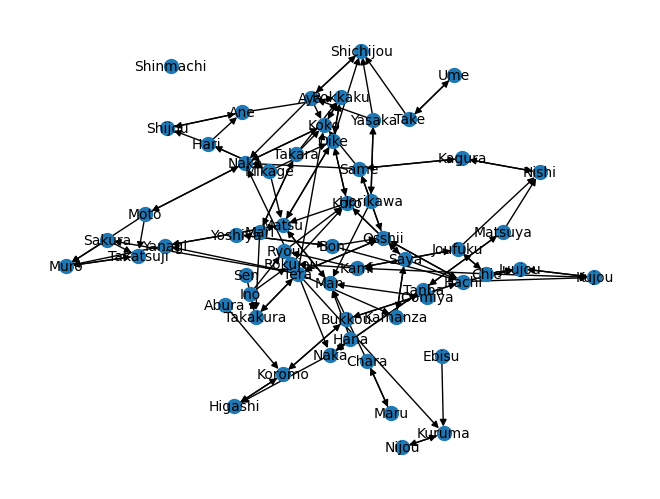

In [51]:
# Caminhos dos arquivos GEXF
files = [
    "Penguin_Couples.gexf",
    "Penguin_Enemies.gexf",
    "Penguin_Exes.gexf",
    "Penguin_Family.gexf",
    "Penguin_Friends.gexf"
]

# Cria um grafo direcionado vazio
complete_graph = nx.DiGraph()

# Combinando os grafos
for file in files:
    G = nx.read_gexf(file)
    complete_graph = nx.compose(complete_graph, G)

# Visualiza o grafo completo com espaçamento ajustado
pos = nx.spring_layout(complete_graph, k=0.3)  # Ajuste o valor de k conforme necessário
nx.draw(complete_graph, pos, with_labels=True, font_weight='normal', node_size=100, font_size=10)
plt.show()


### Calculando os nós e arestas da rede de Pinguins

In [52]:
num_nodes = nx.number_of_nodes(complete_graph)
num_edges = nx.number_of_edges(complete_graph)

# Imprime os resultados
print(f"Quantidade de nós: {num_nodes}")
print(f"Quantidade de arestas: {num_edges}")

Quantidade de nós: 59
Quantidade de arestas: 128


In [53]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

In [54]:
n = 59

## Erdos Renyi (ER)

### Pela definição temos que o grafo no modelo Erdos Renyi (ER) traz a ideia básica: dada uma coleção de nós, estabelecer as arestas de forma aleatória. Temos o número de vértices pré-definido. A existência de cada aresta é determinada por um ensaio de Bernoulli com probabilidade p. 

### O Valor crítico é calculado por (ln n)/n.

In [55]:
np.log(n)/n

0.06911080413399524

### Para valores de P acima de np.log(n)/n, o grafo(G1) é conexo.

### Grafo G1. P > log(n)/n

In [60]:
p = 0.2

357


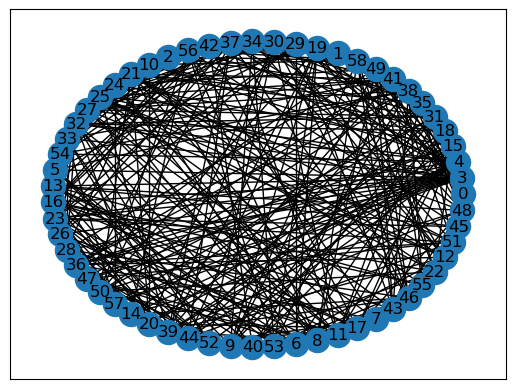

In [61]:
arestas = []
for i in range(n):
    for j in range(i+1, n):
        if np.random.random() < p:
            arestas.append((i,j))

print(len(arestas))            
G1 = nx.from_edgelist(arestas)
nx.draw_networkx(G1, nx.layout.circular_layout(G1))

In [62]:
num_nodes = nx.number_of_nodes(G1)
num_edges = nx.number_of_edges(G1)

# Imprime os resultados
print(f"Quantidade de nós: {num_nodes}")
print(f"Quantidade de arestas: {num_edges}")

Quantidade de nós: 59
Quantidade de arestas: 357


### Para valores de P abaixo de np.log(n)/n, o grafo(G2) é desconexo.

In [68]:
np.log(n)/n

0.06911080413399524

### Grafo G2. P < log(n)/n

In [69]:
p=0.02

44


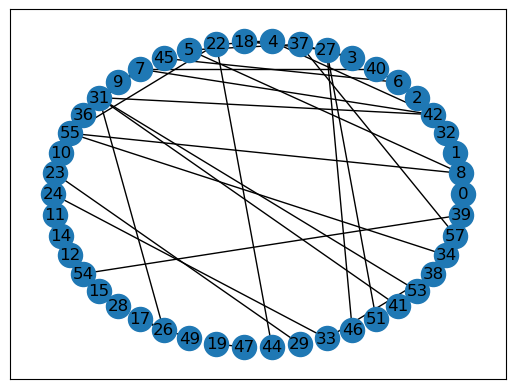

In [70]:
arestas = []
for i in range(n):
    for j in range(i+1, n):
        if np.random.random() < p:
            arestas.append((i,j))

print(len(arestas))            
G2 = nx.from_edgelist(arestas)
nx.draw_networkx(G2, nx.layout.circular_layout(G2))

In [71]:
num_nodes = nx.number_of_nodes(G2)
num_edges = nx.number_of_edges(G2)

# Imprime os resultados
print(f"Quantidade de nós: {num_nodes}")
print(f"Quantidade de arestas: {num_edges}")

Quantidade de nós: 46
Quantidade de arestas: 44


### Gerando grafos(50 simulações) de modelo Erdos-Renyi(ER) com diferentes probabilidades p, calculando o número de arestas em cada realização, e comparando esses valores com os valores teóricos esperados. Isso ajuda a entender como a distribuição do número de arestas em grafos Erdos-Renyi se compara à expectativa teórica para diferentes probabilidades de arestas.

In [72]:
empirico = []
teorico = []
for p in np.linspace(0,1,60):
    m = []
    for i in range(50):
        m.append(len(nx.erdos_renyi_graph(n, p).edges()))
    empirico.append(np.mean(m))
    teorico.append(math.comb(n,2) * p)

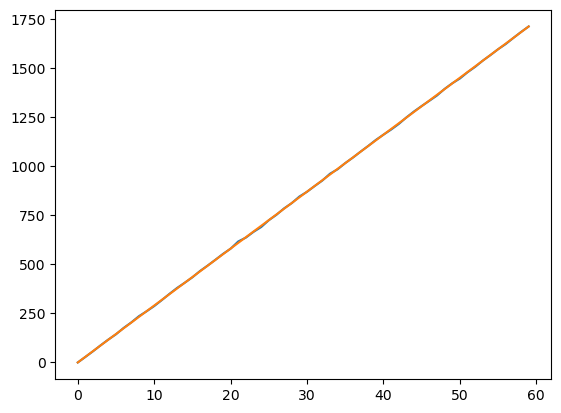

In [73]:
plt.plot(empirico)
plt.plot(teorico)

In [74]:
np.linspace(0,1,30)

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])

In [75]:
n = 61
p = 0.2
empirico = []
for p in np.linspace(0,1,30):
    is_connected = []
    for i in range(50):
        G = nx.erdos_renyi_graph(n, p)
        is_connected.append(nx.is_connected(G))
    empirico.append(np.mean(is_connected))

### O grafo se torna conexo rapidamente

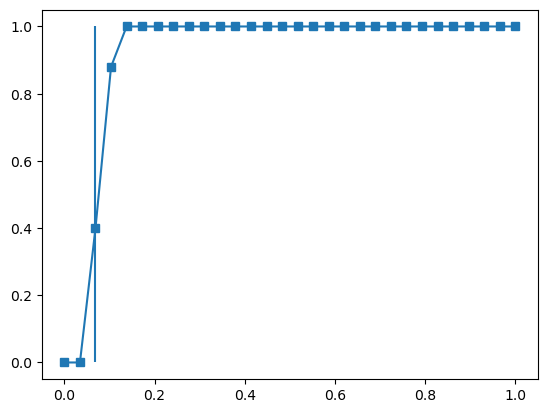

In [76]:
plt.plot(np.linspace(0,1,30), empirico, '-s')
plt.vlines(math.log(n)/n, 0, 1)

### Visualizar graficamente como a função log(n)/n se comporta à medida que o número de nós em uma rede aumenta. O gráfico é útil para observar o comportamento assintótico da função em relação a n.

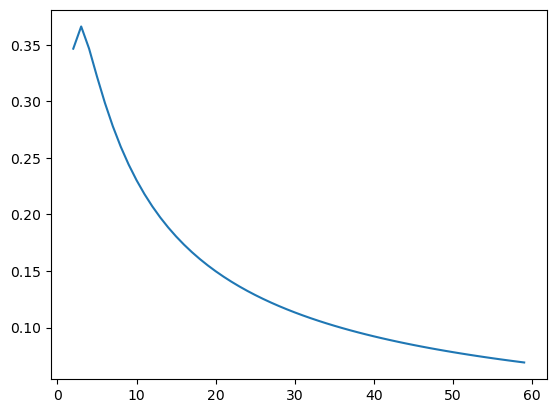

In [77]:
n = np.arange(2,60)
plt.plot(n, np.log(n)/n)

### Distribuição do Grau médio

In [78]:
average_degree_complete = sum(dict(complete_graph.degree()).values()) / len(complete_graph)
average_degree_G1 = sum(dict(G1.degree()).values()) / len(G1)
average_degree_G2 = sum(dict(G2.degree()).values()) / len(G2)

print("Distribuição do Grau Médio:")
print("Complete Graph:", average_degree_complete)
print("G1:", average_degree_G1)
print("G2:", average_degree_G2)

Distribuição do Grau Médio:
Complete Graph: 4.338983050847458
G1: 12.101694915254237
G2: 1.9130434782608696


### Distância Média: Mundo Pequeno. O conceito de "mundo pequeno" em grafos é importante porque reflete a ideia de que, em muitas redes do mundo real, o caminho entre dois nós quaisquer é surpreendentemente curto, mesmo em grafos grandes. A propriedade do mundo pequeno destaca a eficiência das redes na comunicação e conectividade.

In [79]:
def calcular_distancia_media_mundo_pequeno(grafo):
    # Número de nós
    N = len(grafo)

    # Grau médio
    K = sum(dict(grafo.degree()).values()) / N

    # Fórmula do mundo pequeno
    distancia_media_world_small = np.log(N) / np.log(K)

    return distancia_media_world_small

# Calcular a distância média para os três grafos
distancia_media_complete_graph = calcular_distancia_media_mundo_pequeno(complete_graph)
distancia_media_G1 = calcular_distancia_media_mundo_pequeno(G1)
distancia_media_G2 = calcular_distancia_media_mundo_pequeno(G2)

# Imprimir os resultados
print(f"Distância Média usando Mundo Pequeno para Complete Graph: {distancia_media_complete_graph:.4f}")
print(f"Distância Média usando Mundo Pequeno para G1: {distancia_media_G1:.4f}")
print(f"Distância Média usando Mundo Pequeno para G2: {distancia_media_G2:.4f}")


Distância Média usando Mundo Pequeno para Complete Graph: 2.7783
Distância Média usando Mundo Pequeno para G1: 1.6354
Distância Média usando Mundo Pequeno para G2: 5.9021


### Coeficiente de clustering. Clusterização ou Particionamento: É o processo de dividir os nós de um grafo em grupos, chamados clusters ou comunidades, de modo que os nós dentro de um cluster estejam mais densamente conectados entre si do que com os nós fora do cluster.

In [80]:
clustering_complete = nx.average_clustering(complete_graph)
clustering_G1 = nx.average_clustering(G1)
clustering_G2 = nx.average_clustering(G2)

print("\nClusterização:")
print("Coeficiente de Clusterização do Complete Graph:", clustering_complete)
print("Coeficiente de Clusterização do G1:", clustering_G1)
print("Coeficiente de Clusterização do G2:", clustering_G2)


Clusterização:
Coeficiente de Clusterização do Complete Graph: 0.1174047393294023
Coeficiente de Clusterização do G1: 0.21902795638299652
Coeficiente de Clusterização do G2: 0.007246376811594202


### A clusterização em grafos é uma ferramenta poderosa para analisar estruturas complexas, identificar padrões e compreender a organização intrínseca dos nós em uma rede.

## Watts-Strogatz (WS)

### O modelo de Watts-Strogatz é um modelo de rede complexa proposto por Duncan J. Watts e Steven H. Strogatz em 1998. Ele descreve um mecanismo para gerar grafos, combinando a regularidade de grafos regulares com a aleatoriedade de grafos aleatórios. O número de arestas do WS é determinístico, pré-fixado. Com isso o valor esperado do grau dos vértices fica “amarrado”.

Coeficiente de Clustering: 0.0000
Caminho Médio mais curto: 9.4650


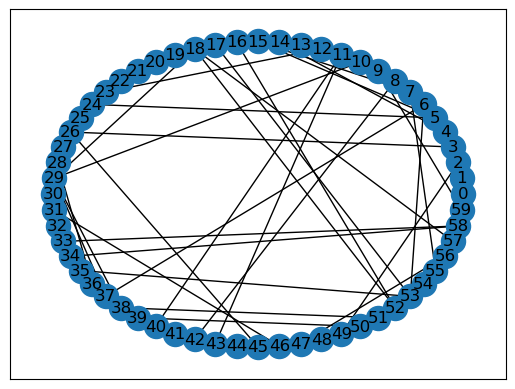

In [153]:
# Cria um grafo de Watts-Strogatz
G = nx.watts_strogatz_graph(60, 2, 0.7)

# Desenha o grafo
nx.draw_networkx(G, nx.layout.circular_layout(G))

# Calcula e imprime as métricas
clustering_coefficient = nx.average_clustering(G)
average_shortest_path_length = nx.average_shortest_path_length(G)

print(f"Coeficiente de Clustering: {clustering_coefficient:.4f}")
print(f"Caminho Médio mais curto: {average_shortest_path_length:.4f}")

# Exibe o gráfico
plt.show()

### Percebemos que basicamente quanto à distância média (mundo pequeno), ocorre um empate com (ER), confirmando o que foi discutido em sala. Em resumo, as métricas são importantes para um grafo de Watts-Strogatz, proporcionando insights sobre a estrutura de mundo pequeno e a organização local e global do grafo.

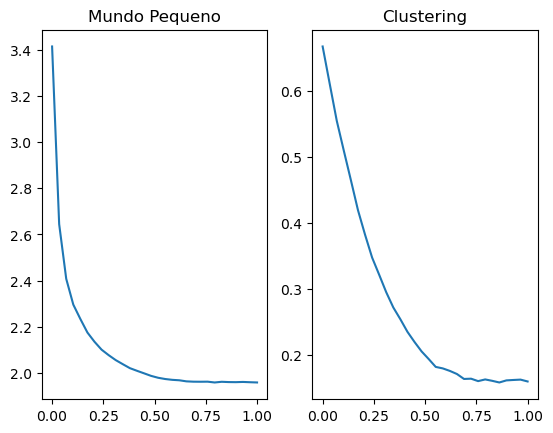

In [8]:
y1 = []
y2 = []

for p in np.linspace(0, 1, 30):
    medida1 = []
    medida2 = []
    
    for i in range(50):
        G = nx.watts_strogatz_graph(59, 10, p)
        medida1.append(nx.average_shortest_path_length(G))
        medida2.append(nx.average_clustering(G))
        
    y1.append(np.mean(medida1))
    y2.append(np.mean(medida2))

plt.subplot(1, 2, 1)
plt.title("Mundo Pequeno")
plt.plot(np.linspace(0, 1, 30), y1)

plt.subplot(1, 2, 2)
plt.title("Clustering")
plt.plot(np.linspace(0, 1, 30), y2)

plt.show()

### Em resumo, na análise visual é verificado a influência do parâmetro de reordenação p nos grafos de Watts-Strogatz, mostrando como o caminho médio mais curto e o coeficiente de agrupamento variam com diferentes níveis de reordenação.

## Barabási-Albert (BA)

### O modelo Barabási-Albert é um modelo de crescimento preferencial para redes complexas, proposto por Albert-László Barabási e Réka Albert em 1999. Esse modelo é amplamente utilizado para explicar a formação de redes de escala livre, que são caracterizadas por terem alguns nós (ou vértices) altamente conectados, conhecidos como "hubs", enquanto a maioria dos nós tem um número relativamente baixo de conexões.

### A proposta é conectar nós aleatoriamente, mas com uma preferência por nós que já possuam muitas ligações. No modelo BA(n, m), onde n é o número total de vértices desejados, a adição de vértices é feita um de cada vez. Cada novo vértice é conectado aleatoriamente a m vértices previamente adicionados, com a preferência proporcional ao número de links que esses vértices já possuem. Esse processo resulta em uma distribuição de grau de lei de potência, característica de redes de escala livre.

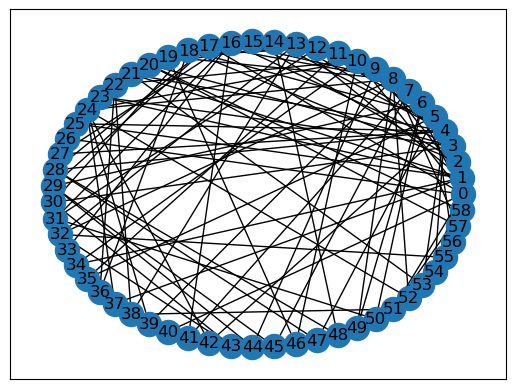

In [37]:
Gba = nx.barabasi_albert_graph(59,2)
nx.draw_networkx(Gba, nx.layout.circular_layout(Gba))

### No resultado acima foi gerado uma rede com o mesmo número de vétices da rede principal de pinguins de kioto

### Comparando o modelo BA com a rede principal

In [38]:
num_nodes = nx.number_of_nodes(Gba)
num_edges = nx.number_of_edges(Gba)

# Imprime os resultados
print(f"Quantidade de nós: {num_nodes}")
print(f"Quantidade de arestas: {num_edges}")

Quantidade de nós: 59
Quantidade de arestas: 114


### A distribuição dos graus segue uma lei de potência, conforme discutido em sala.

In [39]:
average_degree_complete = sum(dict(complete_graph.degree()).values()) / len(complete_graph)
average_degree_Gba = sum(dict(Gba.degree()).values()) / len(Gba)

print("Distribuição do Grau Médio:")
print("Rede Principal:", average_degree_complete)
print("Rede Barabási-Albert :", average_degree_Gba)

Distribuição do Grau Médio:
Rede Principal: 4.338983050847458
Rede Barabási-Albert : 3.864406779661017


### O modelo Barabási-Albert tem sido utilizado para explicar o surgimento de redes complexas em diversos contextos, como redes sociais, redes de citações acadêmicas e redes de interações na web. Sua capacidade de gerar topologias de rede de escala livre ajuda a entender fenômenos emergentes, como a robustez e a vulnerabilidade de certas redes a falhas aleatórias ou ataques direcionados.

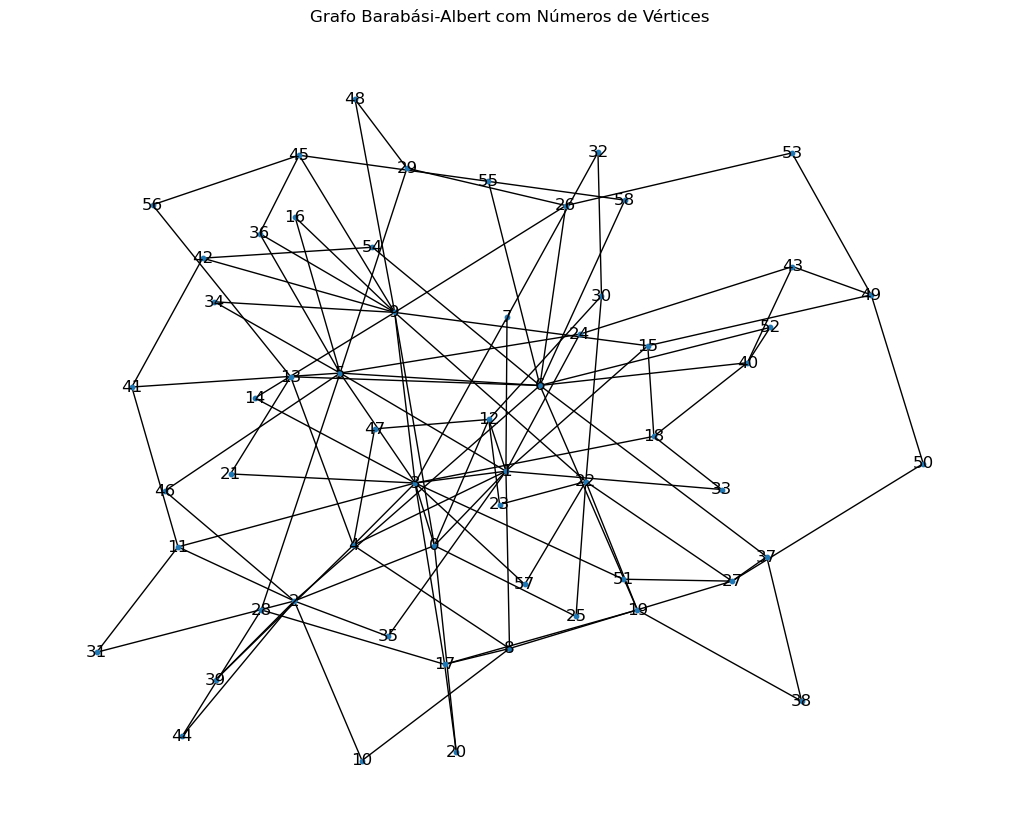

Distância média (Mundo Pequeno) em Barabási-Albert: 2.9011
Distância média (Mundo Pequeno) em Rede Principal: 2.7783


In [82]:
# Parâmetros do modelo Barabási-Albert
n = 59  # Número total de vértices
m = 2     # Número de arestas que cada novo vértice estabelece

# Criação do grafo Barabási-Albert
G_barabasi = nx.barabasi_albert_graph(n, m)

# Cálculo da distância média
ln_n = np.log(n)
ln_ln_n = np.log(ln_n)
expected_average_distance = ln_n / ln_ln_n


# Visualização do grafo com números de vértices
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_barabasi)  # Posição dos vértices
nx.draw(G_barabasi, pos, with_labels=True, node_size=10)
plt.title("Grafo Barabási-Albert com Números de Vértices")
plt.show()

# Impressão da distância média prevista e real
print(f"Distância média (Mundo Pequeno) em Barabási-Albert: {expected_average_distance:.4f}")
print(f"Distância média (Mundo Pequeno) em Rede Principal: {distancia_media_complete_graph:.4f}")



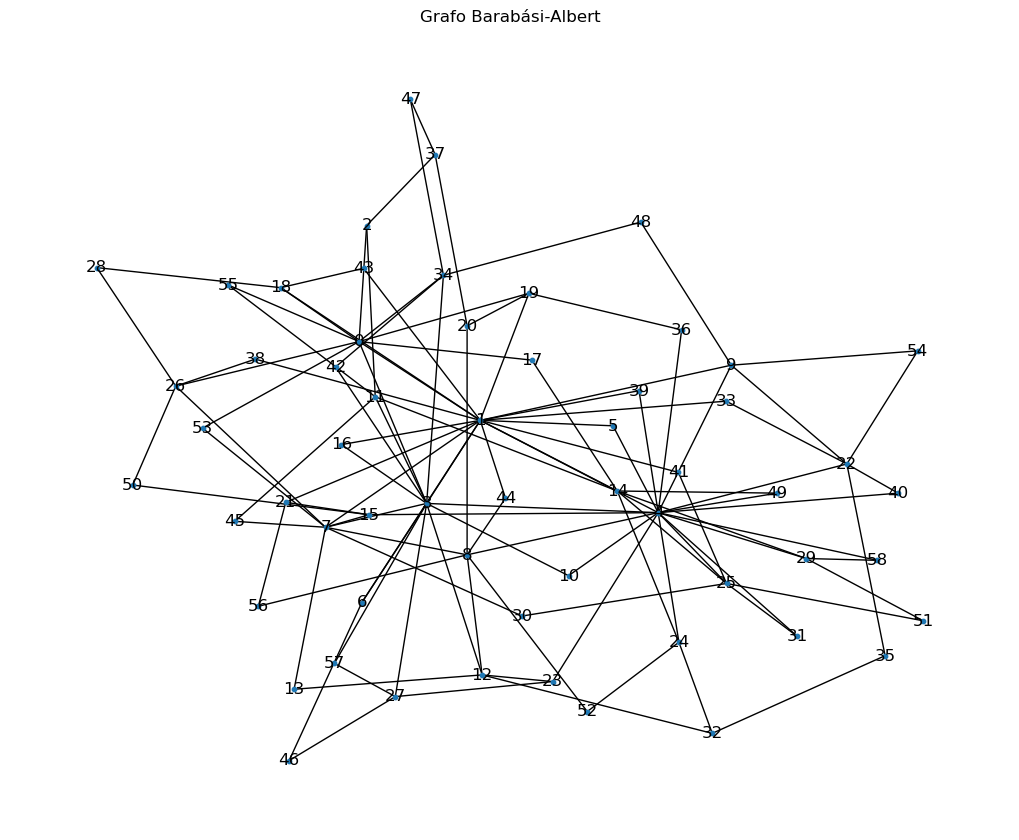

Coeficiente de Clustering em Barabási-Albert: 0.2254
Coeficiente de Clusterização em Rede Principal: 0.1174047393294023


In [83]:
# Parâmetros do modelo Barabási-Albert
n = 59  # Número total de vértices
m = 2     # Número de arestas que cada novo vértice estabelece

# Criação do grafo Barabási-Albert
G_barabasi = nx.barabasi_albert_graph(n, m)

# Cálculo do coeficiente de clustering
clustering_coefficient_barabasi = nx.average_clustering(G_barabasi)

# Visualização do grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_barabasi)  # Posição dos vértices
nx.draw(G_barabasi, pos, with_labels=True, node_size=10)
plt.title("Grafo Barabási-Albert")
plt.show()

# Impressão do coeficiente de clustering
print(f"Coeficiente de Clustering em Barabási-Albert: {clustering_coefficient_barabasi:.4f}")
print("Coeficiente de Clusterização em Rede Principal:", clustering_complete)

### Fica evidente que a rede sintética proposta pelo modelo Barabási Albert é muito mais comportada e aderente a rede principal de Pinguins de Kioto.